<a href="https://colab.research.google.com/github/sunaina1701/MSA-of-BRCA1-using-Bio-Python/blob/main/MSA_(BRCA1_nt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install required tools
!pip install biopython
!apt-get install -y clustalo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 61.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 0s (1,039 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack

In [ ]:
from Bio import SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import Counter
import subprocess

In [ ]:
# Define sequences and write to FASTA file
sequences = [
    SeqRecord (Seq ( ("TCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGATAATCACTTGCTGA"
                      "GTGTGTTTCTCAAACAATTTAATTTCAGGAGCCTACAAGAAAGTACGAGATTTAGTCAACTTGTTGAAGA"
                      "GCTATTGAAAATCATTTGTGCTTTTCAGCTTGACACAGGTTTGGAGTGTAAGTGTTGAATATCCCAAGAA"
                      "TGACACTCAAGTGCTGTCCATGAAAACTCAGGAAGTTTGCACAATTACTTTCTATGACGTGGTGATAAGA"
                      "CCTTTTAGTCTAGGTTAATTTTAGTTCTGTATCTGTAATCTATTTTTAAAAAATTACTCCCACTGGTCTC"
                      "ACACC") ), id="seq1", description="" ),
    SeqRecord(Seq(("CTACTGTTGCTGCATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGA"
"TAATCACTTGCTGAGTGTGTTTCTCAAACAATTTAATTTCAGGAGCCTACAAGAAAGTACGAGATTTAGT"
"CAACTTGTTGAAGAGCTATTGAAAATCATTTGTGCTTTTCAGCTTGACACAGGTTTGGAGTGTAAGTGTT"
"GAATATCCCAAGAATGACACTCAAGTGCTGTCCATGAAAACTCAGGAAGTTTGCACAATTACTTTCTATG"
"ACGTGGTGATAAGACCTTTTAGTCTAGGTTAATTTTAGTTCTGTATCTGTAATCTATTTTTAAAAAATTA"
"CTCCCACTGGTCTCACACC")), id="seq2", description=""),
    SeqRecord(Seq(("ATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGATAATCACTTGCTR"
"AGTGTGTTTCTCAAACAATTTAATTTCAGGAGCCTACAAGAAAGTACGAGATTTAGTCAACTTGTTGAAG"
"AGCTATTGAAAATCATTTGTGCTTTTCAGCTTGACACAGGTTTGGAGTGTAAGTGTTGAATATCCCAAGA"
"ATGACACTCAAGTGCTGTCCATGAAAACTCAGGAAGTTTGCACAATTACTTTCTATGACGTGGTGATAAG"
"ACCTTTTAGTCTAGGTTAATTTTAGTTCTGTATCTGTAATCTATTTTTAAAAAATTACTCCCACTGGTCT"
"CACACCTCA")), id="seq3", description=""),
    SeqRecord(Seq(("ATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGATAATCACTTGCTR"
"AGTGTGTTTCTCAAACAATTTAATTTCAGGAGCCTACAAGAAAGTACGAGATTTAGTCAACTTGTTGAAG"
"AGCTATTGAAAATCATTTGTGCTTTTCAGCTTGACACAGGTTTGGAGTGTAAGTGTTGAATATCCCAAGA"
"ATGACACTCAAGTGCTGTCCATGAAAACTCAGGAAGTTTGCACAATTACTTTCTATGACGTGGTGATAAG"
"ACCTTTTAGTCTAGGTTAATTTTAGTTCTGTATCTGTAATCTATTTTTAAAAAATTACTCCCACTGGTCT"
"CACACCTCA")), id="seq4", description=""),
    SeqRecord(Seq(("TTTTTTAACCCTTTTAATTAAGAAAACTTTTATTGATTTATTTTTTGGGGGGAAATTTTTTAGGATCTGA"
"TTCTTCTGAAGATACCGTTAATAAGGCAACTTATTGCAGGTGAGTCAAAGAGAACCTTTGTCTATGAAGC"
"TGGTATTTTCCTATTTAGTTAATATTAAGGATTGATGTTTCTCTCTTTTTAAAAATATTTTAACTTTTAT"
"TTTAGGTTCAGGGATGTATGTGCAGTTTGTTATATAGGTAAACACACGACTTGGGATTTGGTGTACAGAT"
"TTTTTTCATCATCCGGGTACTAAGCATA")), id="seq5", description="")
]

fasta_file = "input_sequence.fasta"
with open(fasta_file, "w") as f:
  SeqIO.write(sequences, f, "fasta")

In [ ]:
#Run Clustal Omega alignment
aligned_file = "aligned_output.fasta"
command = f"clustalo -i {fasta_file} -o {aligned_file} --force --outfmt=fasta"
subprocess.run(command, shell=True, check=True)

CompletedProcess(args='clustalo -i input_sequence.fasta -o aligned_output.fasta --force --outfmt=fasta', returncode=0)

In [ ]:
# read and display aligned sequences
alignment = AlignIO.read(aligned_file, "fasta")
print("Aligned Sequences:")
for record in alignment:
  print(f"{record.id}: {record.seq}")

Aligned Sequences:
seq1: --------------TCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGATAATCACTTGCTGAGTGTGTTTCTCAAACAATTTAATTTCAGGAGCCTACAAGAAAGTACGAGATTTAGTCAACTTGTTGAAGAGCTATTGAAAATCATTTGTG--------------CTTTTCAGCTTGACACAGGTTTGGAGTGTAAGTGTTGAATATCCCAAGA------ATGACACTCAAGTGCTGTCCATGAAAACTCAGGAAGTTTGCACAAT---------TACTTTCTATGACGTGGTGATAAGACCTTTTAGTCTAGGTTAATTTTAGTTCTGTATCTGTAATCTATTTTTAAAAAATTACTCCCACTGGTCTCACACC---
seq2: CTACTGTTGCTGCATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGATAATCACTTGCTGAGTGTGTTTCTCAAACAATTTAATTTCAGGAGCCTACAAGAAAGTACGAGATTTAGTCAACTTGTTGAAGAGCTATTGAAAATCATTTGTG--------------CTTTTCAGCTTGACACAGGTTTGGAGTGTAAGTGTTGAATATCCCAAGA------ATGACACTCAAGTGCTGTCCATGAAAACTCAGGAAGTTTGCACAAT---------TACTTTCTATGACGTGGTGATAAGACCTTTTAGTCTAGGTTAATTTTAGTTCTGTATCTGTAATCTATTTTTAAAAAATTACTCCCACTGGTCTCACACC---
seq3: -------------ATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGATAATCACTTGCTRAGTGTGTTTCTCAAACAATTTAATTTCAGGAGCCTACAAGAAAGTACGAGATTTAGTCAACTTGTTGAAGAGCTAT

In [ ]:
# save aligned sequences in CLUSTAL format
AlignIO.write(alignment, "aligned_output.aln", "clustal")

1

In [ ]:
# identify conserved positions
print("Conserved Positions:")
for i in range(len(alignment[0])) :
  column = [record.seq[i] for record in alignment]
  counts = Counter(column)
  if len(counts) == 1:
    print(f"Position {i+1}: {column[0]} (conserved)")

Conserved Positions:
Position 15: T (conserved)
Position 17: T (conserved)
Position 18: T (conserved)
Position 19: A (conserved)
Position 24: T (conserved)
Position 26: T (conserved)
Position 27: T (conserved)
Position 30: T (conserved)
Position 31: T (conserved)
Position 33: A (conserved)
Position 35: A (conserved)
Position 39: C (conserved)
Position 40: T (conserved)
Position 41: T (conserved)
Position 42: T (conserved)
Position 43: T (conserved)
Position 45: T (conserved)
Position 46: T (conserved)
Position 49: T (conserved)
Position 50: T (conserved)
Position 51: T (conserved)
Position 52: A (conserved)
Position 59: T (conserved)
Position 60: T (conserved)
Position 65: G (conserved)
Position 66: G (conserved)
Position 69: G (conserved)
Position 70: A (conserved)
Position 72: A (conserved)
Position 74: T (conserved)
Position 104: T (conserved)
Position 106: A (conserved)
Position 113: G (conserved)
Position 114: A (conserved)
Position 117: C (conserved)
Position 118: T (conserved)
P

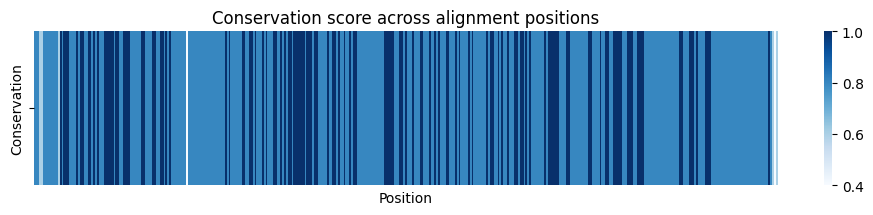

In [ ]:
#heatmap of conservation across alignment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#build a matrix of character frequencies per column
alignment_array = np.array([list(rec.seq) for rec in alignment])
num_seqs, seq_len = alignment_array.shape

#count most common characters per column
conservation_scores =[]
for i in range(seq_len):
  column = alignment_array[:,i]
  counts = Counter(column)
  most_common = counts.most_common(1)[0][1]
  score = most_common / num_seqs
  conservation_scores.append(score)

#plot conservation
plt.figure(figsize=(12,2))
sns.heatmap([conservation_scores], cmap="Blues", cbar=True , xticklabels=False , yticklabels=["Conservation"] )
plt.title("Conservation score across alignment positions")
plt.xlabel("Position")
plt.show()

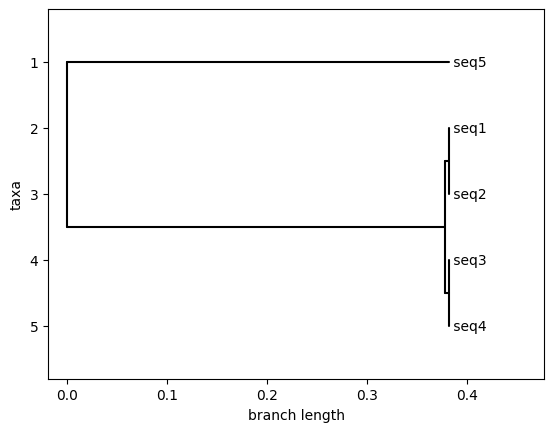

In [ ]:
# generate and visualize phylogenetic tree
!pip install biopython
from Bio import Phylo
import subprocess

#use the alignment saved in CLUSTAL format
aln_file = "aligned_output.aln"
dnd_file = "alignment.dnd"
fasta_file = "input_sequence.fasta" # Assuming fasta_file is defined elsewhere

#generate tree using Clustal omega again ( outputs.dnd file)
tree_cmd = f"clustalo -i {fasta_file} -o {aln_file} --guidetree-out={dnd_file} --force --outfmt=clustal"
subprocess.run(tree_cmd, shell=True, check=True)

#read and draw tree
tree= Phylo.read(dnd_file, "newick")
Phylo.draw(tree)

In [ ]:
#print alignment with '*' for conserved positions
print ("Alignment with conserved positions marked by '*' :")
for record in alignment:
  print(f"{record.id:<10}: {record.seq}")

#identify conserved positions
cons_line = ""
for i in range(seq_len):
  col = [record.seq[i] for record in alignment]
  if all(base == col[0] for base in col):
    cons_line += "*"
  else:
    cons_line += " "
print( " " * 11 + cons_line)

Alignment with conserved positions marked by '*' :
seq1      : --------------TCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGATAATCACTTGCTGAGTGTGTTTCTCAAACAATTTAATTTCAGGAGCCTACAAGAAAGTACGAGATTTAGTCAACTTGTTGAAGAGCTATTGAAAATCATTTGTG--------------CTTTTCAGCTTGACACAGGTTTGGAGTGTAAGTGTTGAATATCCCAAGA------ATGACACTCAAGTGCTGTCCATGAAAACTCAGGAAGTTTGCACAAT---------TACTTTCTATGACGTGGTGATAAGACCTTTTAGTCTAGGTTAATTTTAGTTCTGTATCTGTAATCTATTTTTAAAAAATTACTCCCACTGGTCTCACACC---
seq2      : CTACTGTTGCTGCATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGATAATCACTTGCTGAGTGTGTTTCTCAAACAATTTAATTTCAGGAGCCTACAAGAAAGTACGAGATTTAGTCAACTTGTTGAAGAGCTATTGAAAATCATTTGTG--------------CTTTTCAGCTTGACACAGGTTTGGAGTGTAAGTGTTGAATATCCCAAGA------ATGACACTCAAGTGCTGTCCATGAAAACTCAGGAAGTTTGCACAAT---------TACTTTCTATGACGTGGTGATAAGACCTTTTAGTCTAGGTTAATTTTAGTTCTGTATCTGTAATCTATTTTTAAAAAATTACTCCCACTGGTCTCACACC---
seq3      : -------------ATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTTGATAATCACTTGCTRAGTGTGTTTCTCAAACAATTTAATTT